<a href="https://colab.research.google.com/github/Navaneethp0/Heart-Disease-Prediction/blob/main/Heart_Diseas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Heart_Disease_Prediction.csv")
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
data.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
data.shape

(270, 14)

In [ ]:
data.value_counts()

Age  Sex  Chest pain type  BP   Cholesterol  FBS over 120  EKG results  Max HR  Exercise angina  ST depression  Slope of ST  Number of vessels fluro  Thallium  Heart Disease
29   1    2                130  204          0             2            202     0                0.0            1            0                        3         Absence          1
59   1    4                170  326          0             2            140     1                3.4            3            0                        7         Presence         1
58   1    4                128  259          0             2            130     1                3.0            2            2                        7         Presence         1
                           146  218          0             0            105     0                2.0            2            1                        7         Presence         1
                           150  270          0             2            111     1                0.8          

In [ ]:
data["Heart Disease"].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

# DATA VISUALIZATION

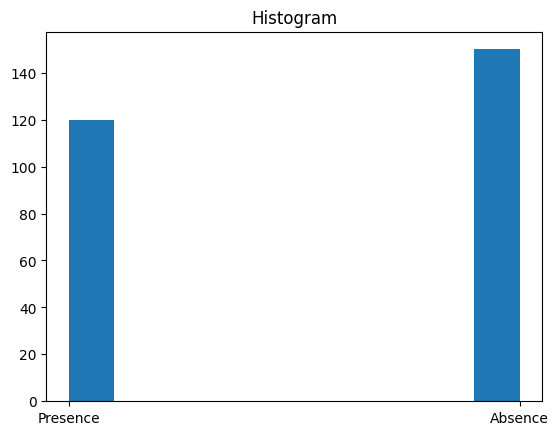

In [ ]:
plt.hist(data["Heart Disease"])
plt.title("Histogram")
plt.show()

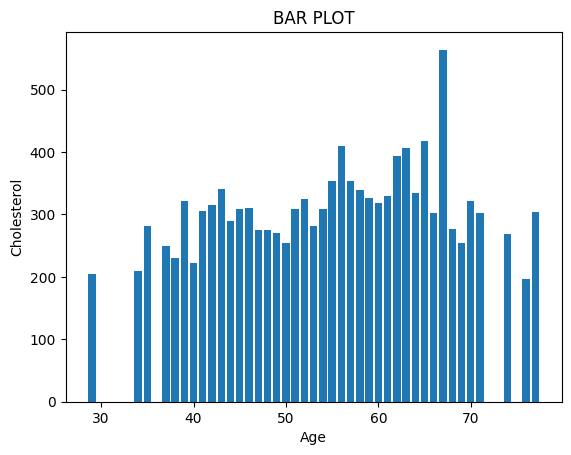

In [ ]:
plt.bar(data["Age"],data["Cholesterol"])
plt.title('BAR PLOT')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


<ipython-input-349-1bcca393b0c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()
<ipython-input-349-1bcca393b0c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

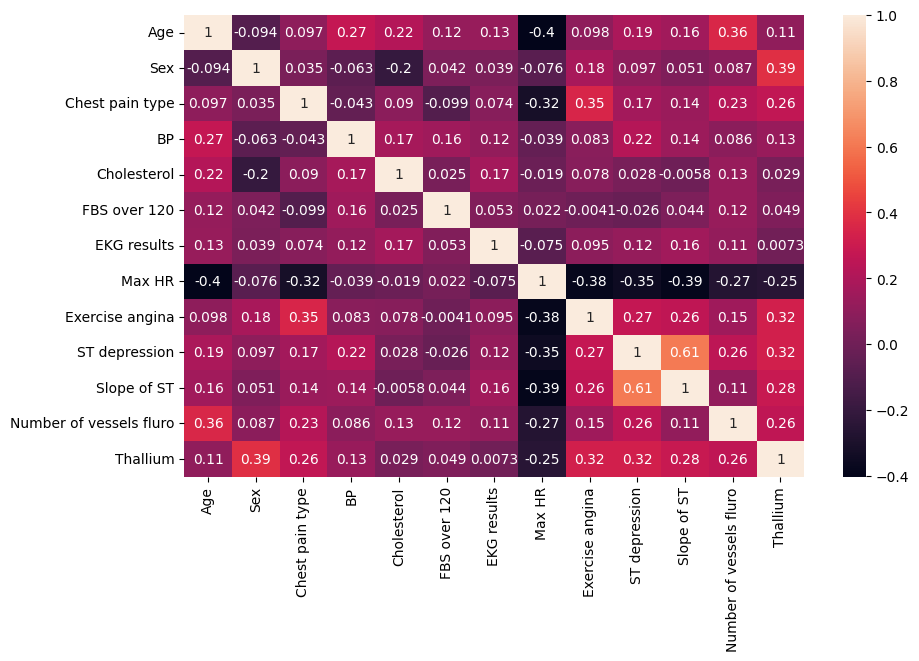

In [ ]:
data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

Text(0.5, 1.0, 'Age vs BP')

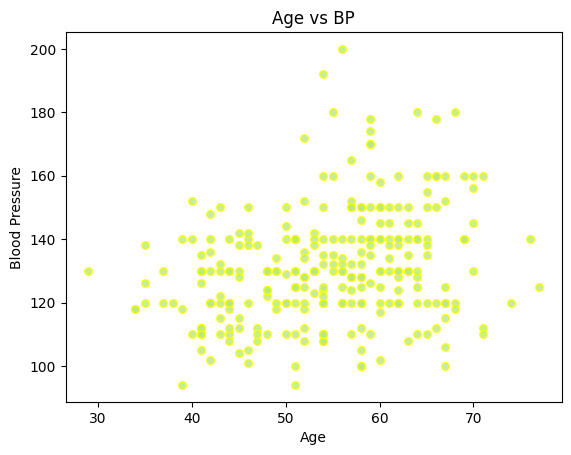

In [ ]:
plt.scatter(data['Age'],data['BP'], s=30, c = '#b6eb7a', edgecolor = 'yellow', linewidth = 1, alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs BP')

### ***LABEL ENCODING***

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Heart Disease']=le.fit_transform(data['Heart Disease'])
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


# FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)
data_scaled=pd.DataFrame(data_scaled)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00,1.0
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00,0.0
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00,1.0
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00,0.0
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00,0.0
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00,0.0
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00,0.0
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75,0.0


In [ ]:
x=data_scaled.iloc[:,[0,1,2,3,4,8,9,10,11,12]].values
y=data_scaled.iloc[:,[13]].values


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=6)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8518518518518519

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)
cf

array([[26,  3],
       [ 5, 20]])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

<ipython-input-359-8e3a8d31c722>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
y_pred1=classifier.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.8333333333333334

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[24,  5],
       [ 4, 21]])

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
y_preed=classifier.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_preed)
accuracy

0.8703703703703703

In [ ]:
f=confusion_matrix(y_test,y_preed)
f

array([[24,  5],
       [ 2, 23]])

## SVM

In [ ]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [ ]:
y_predd=model.predict(x_test)

In [ ]:
acc=accuracy_score(y_predd,y_test)
acc

0.8888888888888888

In [ ]:
from sklearn.metrics import confusion_matrix
aa=confusion_matrix(y_test,y_predd)
aa

array([[26,  3],
       [ 3, 22]])

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model_deci=DecisionTreeClassifier(criterion='entropy',random_state=42)
model_deci.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_preedd=model_deci.predict(x_test)
accuracy_score(y_test,y_preedd)

0.7222222222222222

In [ ]:
m=confusion_matrix(y_preedd,y_test)
m

array([[22,  8],
       [ 7, 17]])

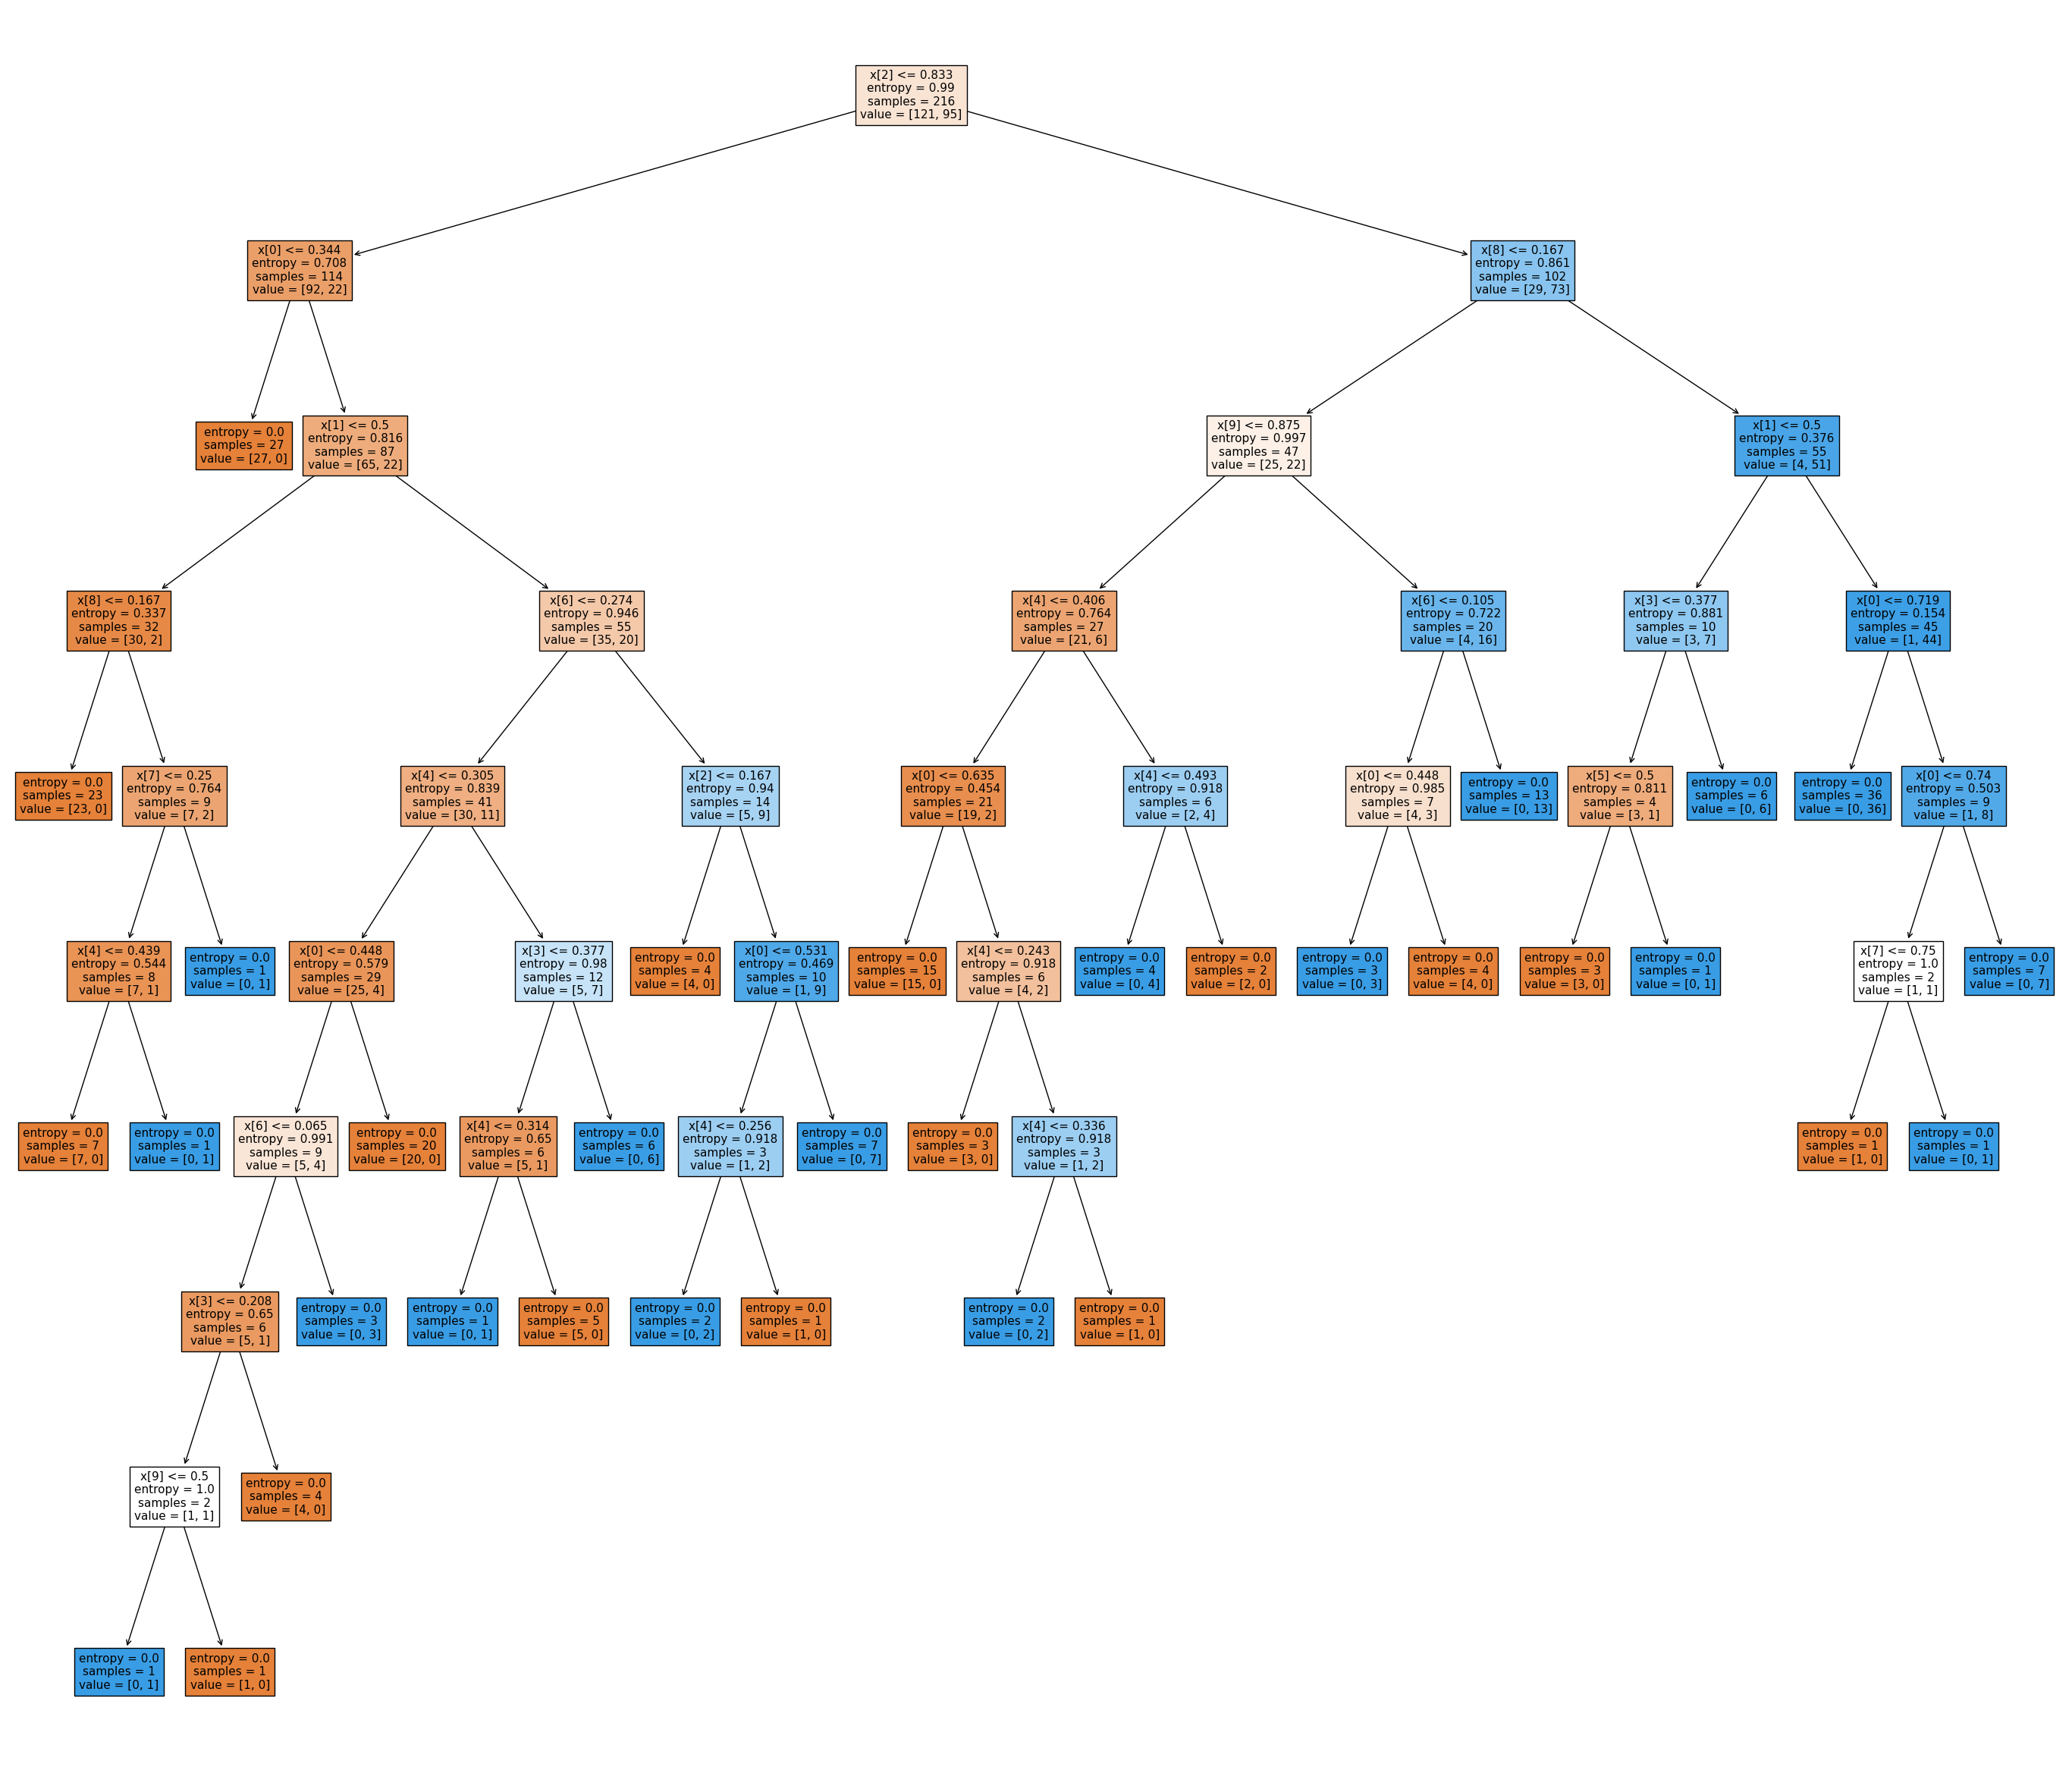

In [ ]:
plt.figure(figsize=(35,30))
plot_tree(model_deci,filled=True)
plt.show()

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_predd2=gnb.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ss=confusion_matrix(y_test,y_predd2)
ss

array([[26,  3],
       [ 2, 23]])

In [ ]:
accuracy_score(y_test,y_predd2)

0.9074074074074074

## CONCLUSION OF HEART DISEASE PREDICTION

## THE ACCURACY SCORE WE GOT USING LOGISTIC REGRESSION IS - 85.18%

## THE ACCURACY SCORE WE GOT USING RANDOM FOREST TREE IS - 83.33%

## THE ACCURACY SCORE WE GOT USING KNN IS - 87.03%

## THE ACCURACY SCORE WE GOT USING SVM IS - 88.88%

## THE ACCURACY SCORE WE GOT USING DECISION TREE IS - 72.22

## THE ACCURACY SCORE WE GOT USING NAIVEBAYES IS - 90.74

## HERE NAIVEBAYES GIVES MORE ACCURACY